In [ ]:
!pip install tensorflow-gpu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [37]:
import os
os.makedirs("drive/My Drive/Models",exist_ok=True)
os.makedirs("drive/My Drive/Logs",exist_ok=True)
path_to_model="drive/My Drive/Models"
path_to_logs = "drive/My Drive/Logs"

# MNIST DNN

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random 
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mnist_data = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist_data.load_data()
print("Shape training set "+str(train_images.shape))
print("Shape Test set "+str(test_images.shape))
print("No of training exapmles "+str(train_images.shape[0]))
print("No of Test exapmles "+str(test_images.shape[0]))
print("Shape of Each Image "+str(train_images[0].shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape training set (60000, 28, 28)
Shape Test set (10000, 28, 28)
No of training exapmles 60000
No of Test exapmles 10000
Shape of Each Image (28, 28)


This is image of Number 7


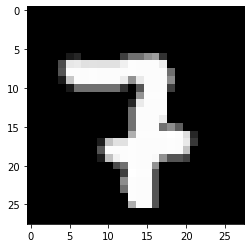

In [6]:
def disp():
    id = random.randint(0,train_images.shape[0])
    img = train_images[id]
    l = train_labels[id]
    plt.imshow(img,cmap='gray')
    print("This is image of Number "+str(l))
    plt.show()
disp()

In [7]:
train_images = train_images/255
test_images = test_images/255
print("Range of image 0-1")

Range of image 0-1


In [8]:
model_name = 'mnist_dnn_'
input_shape = (28,28)
activation_h = tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
epochs =100

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))
model.add(tf.keras.layers.Dense(128,activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()

model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.h5", monitor = 'val_accuracy',verbose=1, save_best_only=True)
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")
h=model.fit(train_images,train_labels,batch_size=128,validation_data=(test_images,test_labels),epochs=epochs,callbacks=[checkpointer,es,logs])

Epoch 1/100
467/469 [============================>.] - ETA: 0s - loss: 0.3686 - accuracy: 0.8990
Epoch 00001: val_accuracy improved from -inf to 0.94310, saving model to drive/My Drive/Models/mnist_dnn_.h5
469/469 [==============================] - 2s 4ms/step - loss: 0.3678 - accuracy: 0.8992 - val_loss: 0.2020 - val_accuracy: 0.9431
Epoch 2/100
457/469 [============================>.] - ETA: 0s - loss: 0.1652 - accuracy: 0.9536
Epoch 00002: val_accuracy improved from 0.94310 to 0.96060, saving model to drive/My Drive/Models/mnist_dnn_.h5
469/469 [==============================] - 1s 3ms/step - loss: 0.1649 - accuracy: 0.9537 - val_loss: 0.1341 - val_accuracy: 0.9606
Epoch 3/100
449/469 [===========================>..] - ETA: 0s - loss: 0.1155 - accuracy: 0.9672
Epoch 00003: val_accuracy improved from 0.96060 to 0.96910, saving model to drive/My Drive/Models/mnist_dnn_.h5
469/469 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9671 - val_loss: 0.1026 - val_

Text(0.5, 1.0, 'accuracy')

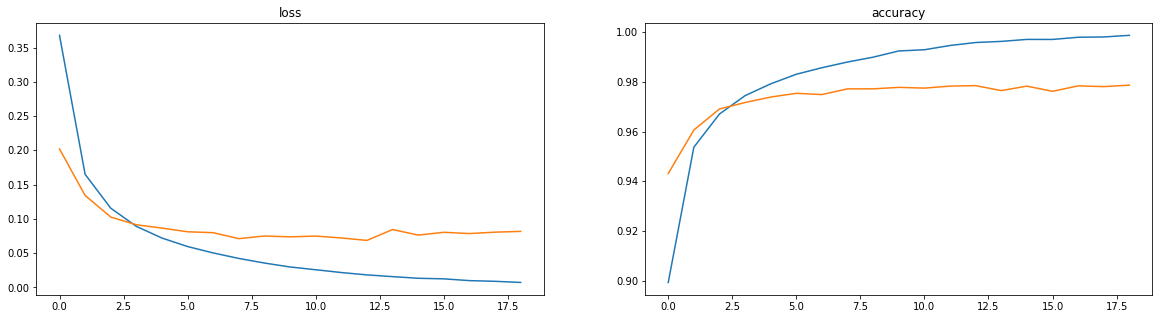

In [12]:
fig, axs = plt.subplots(1, 2,figsize=(20,5))
axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')
axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')

In [13]:
model = tf.keras.models.load_model(f"{path_to_model}/{model_name}.h5")

In [14]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*1000,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :99.0 %
Validation Loss :0.08165675401687622


In [15]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*1000,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :98.7667 %
Training Validation Loss :0.0055235037580132484


In [16]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



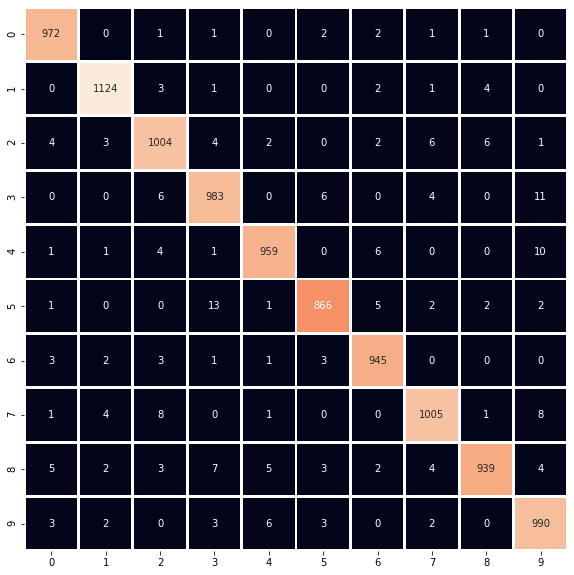

In [18]:
import seaborn as sns
labels = ['0','1','2','3','4','5','6','7','8','9']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# DNN Cifar

In [38]:
cifar_data = tf.keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels) = cifar_data.load_data()
print("Shape of training set "+str(train_images.shape))
print("Shape of Test set "+str(test_images.shape))
print("No of training exapmles "+str(train_images.shape[0]))
print("No of Test exapmles "+str(test_images.shape[0]))
print("Shape of Each Image "+str(train_images[0].shape))

Shape of training set (50000, 32, 32, 3)
Shape of Test set (10000, 32, 32, 3)
No of training exapmles 50000
No of Test exapmles 10000
Shape of Each Image (32, 32, 3)


This is image of Number [1]


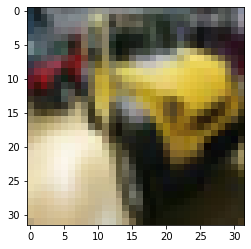

In [39]:
def disp():
    id = random.randint(0,train_images.shape[0])
    img = train_images[id]
    l = train_labels[id]
    plt.imshow(img)
    print("This is image of Number "+str(l))
    plt.show()
disp()

In [40]:
train_images = train_images/255
test_images = test_images/255
print("Range of image 0-1")

Range of image 0-1


In [41]:
model_name = 'cifar_dnn'
input_shape = (32,32)
activation_h= tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
epochs =100

In [42]:
inp_shape=(32,32,3)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=inp_shape))
model.add(tf.keras.layers.Dense(512,activation=activation_h))
model.add(tf.keras.layers.Dense(256,activation=activation_h))
model.add(tf.keras.layers.Dense(128,activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [43]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True,)

es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)

logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")
h = model.fit(train_images,train_labels,batch_size=128,validation_data=(test_images,test_labels),epochs=epochs,callbacks=[checkpointer,es,logs])

Epoch 1/100
380/391 [============================>.] - ETA: 0s - loss: 1.8893 - accuracy: 0.3140
Epoch 00001: val_accuracy improved from -inf to 0.37460, saving model to drive/My Drive/Models/cifar_dnn.hdf5
391/391 [==============================] - 2s 5ms/step - loss: 1.8850 - accuracy: 0.3154 - val_loss: 1.7096 - val_accuracy: 0.3746
Epoch 2/100
376/391 [===========================>..] - ETA: 0s - loss: 1.6770 - accuracy: 0.3966
Epoch 00002: val_accuracy improved from 0.37460 to 0.43080, saving model to drive/My Drive/Models/cifar_dnn.hdf5
391/391 [==============================] - 1s 4ms/step - loss: 1.6741 - accuracy: 0.3979 - val_loss: 1.5987 - val_accuracy: 0.4308
Epoch 3/100
376/391 [===========================>..] - ETA: 0s - loss: 1.5877 - accuracy: 0.4315
Epoch 00003: val_accuracy improved from 0.43080 to 0.45290, saving model to drive/My Drive/Models/cifar_dnn.hdf5
391/391 [==============================] - 1s 4ms/step - loss: 1.5888 - accuracy: 0.4308 - val_loss: 1.5468 - v

Text(0.5, 1.0, 'accuracy')

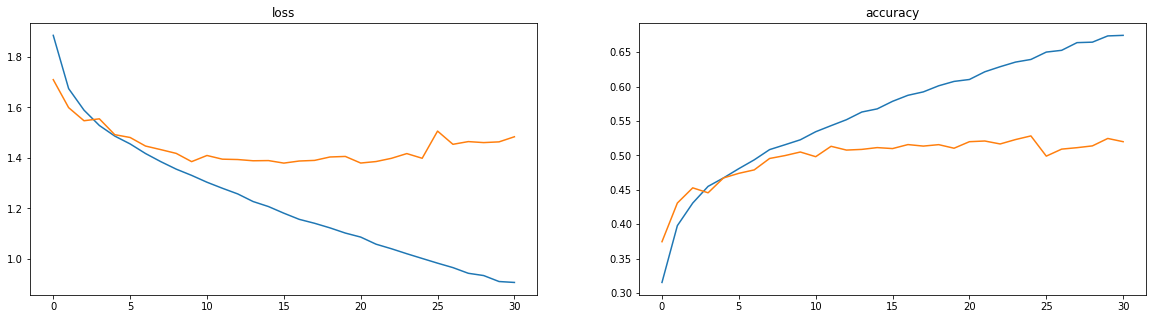

In [44]:
fig, axs = plt.subplots(1, 2,figsize=(20,5))
axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')
axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')

In [46]:
model = tf.keras.models.load_model(f"{path_to_model}/{model_name}.h5")

In [47]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*100,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :11.13 %
Validation Loss :1.3981897830963135


In [48]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*100,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :11.03 %
Training Validation Loss :0.9636645317077637


In [49]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59      1000
           1       0.66      0.58      0.62      1000
           2       0.42      0.39      0.40      1000
           3       0.42      0.33      0.37      1000
           4       0.43      0.51      0.46      1000
           5       0.45      0.46      0.45      1000
           6       0.61      0.51      0.55      1000
           7       0.59      0.57      0.58      1000
           8       0.62      0.68      0.65      1000
           9       0.54      0.64      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.53      0.53     10000



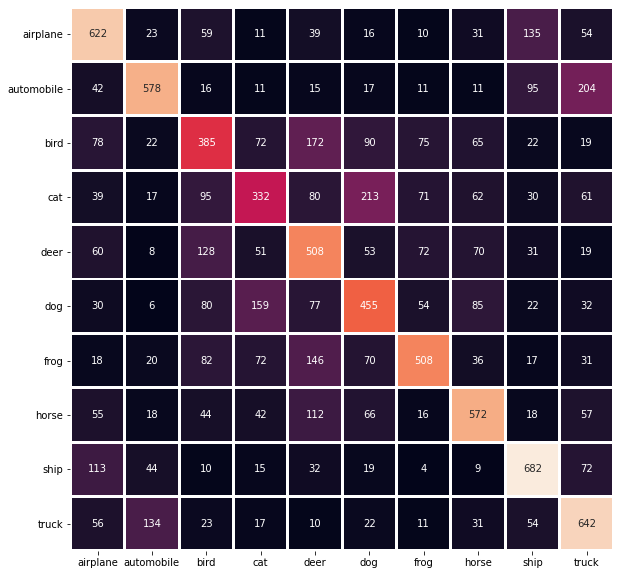

In [51]:
import seaborn as sns
labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# CNN Cifar

In [96]:
model_name = 'cifar_cnn'
input_shape = (32,32,3)
activation_h= tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
epochs =100

In [97]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_h, input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_h))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               295168    
_________________________________________________________________
dense_25 (Dense)             (None, 10)               

In [98]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True,)

es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)

logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")

In [99]:
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

h = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels),callbacks=[checkpointer,es,logs])

Epoch 1/100
1560/1563 [============================>.] - ETA: 0s - loss: 2.0692 - accuracy: 0.3847
Epoch 00001: val_accuracy improved from -inf to 0.46680, saving model to drive/My Drive/Models/cifar_cnn.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0691 - accuracy: 0.3848 - val_loss: 1.9903 - val_accuracy: 0.4668
Epoch 2/100
1550/1563 [============================>.] - ETA: 0s - loss: 1.9428 - accuracy: 0.5162
Epoch 00002: val_accuracy improved from 0.46680 to 0.55260, saving model to drive/My Drive/Models/cifar_cnn.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9427 - accuracy: 0.5164 - val_loss: 1.9059 - val_accuracy: 0.5526
Epoch 3/100
1546/1563 [============================>.] - ETA: 0s - loss: 1.8858 - accuracy: 0.5741
Epoch 00003: val_accuracy improved from 0.55260 to 0.58920, saving model to drive/My Drive/Models/cifar_cnn.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8858 - accuracy: 0.5741 - val_loss: 1.87

Text(0.5, 1.0, 'accuracy')

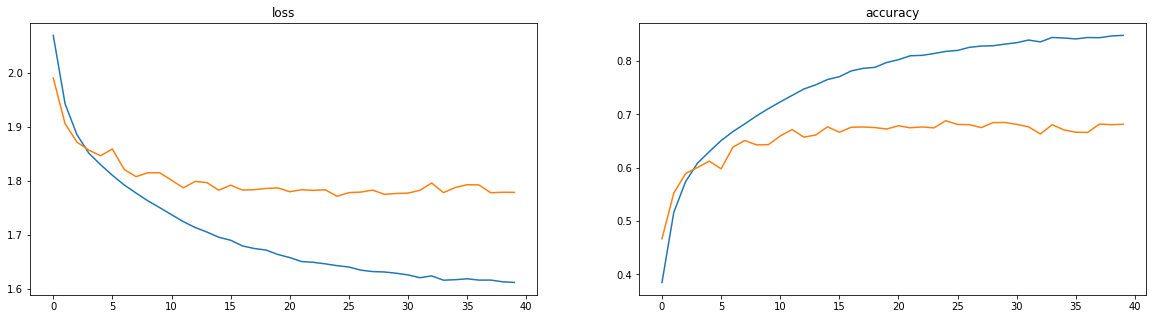

In [100]:
fig, axs = plt.subplots(1, 2,figsize=(20,5))
axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')
axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')

In [101]:
model = tf.keras.models.load_model(f"{path_to_model}/{model_name}.h5")

In [104]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*1000,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :95.6 %
Validation Loss :1.7717688083648682


In [103]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*1000,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :95.92 %
Training Validation Loss :1.6254245042800903


In [105]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1000
           1       0.81      0.79      0.80      1000
           2       0.66      0.50      0.57      1000
           3       0.51      0.48      0.50      1000
           4       0.59      0.69      0.64      1000
           5       0.56      0.61      0.59      1000
           6       0.77      0.76      0.76      1000
           7       0.70      0.76      0.73      1000
           8       0.78      0.80      0.79      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



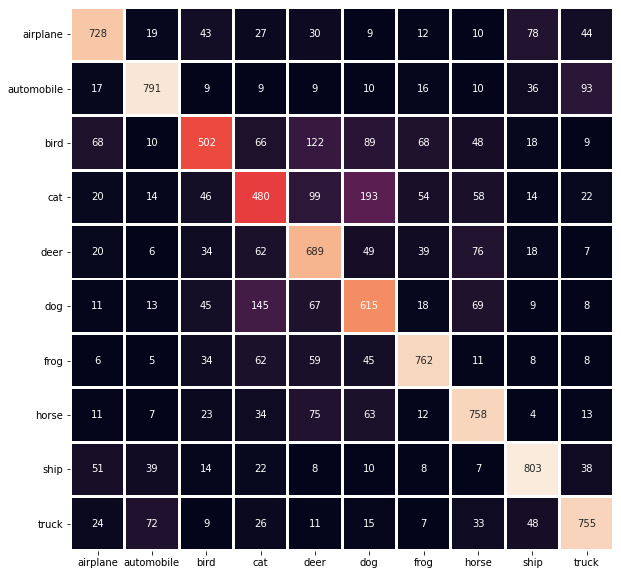

In [107]:
import seaborn as sns
labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# CIFAR CNN Vs DNN

In [108]:
model_cnn = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_cnn.h5')
model_dnn = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_dnn.h5')

In [109]:
logs_cnn = pd.read_csv('/content/drive/My Drive/Logs/cifar_cnn.csv')
logs_dnn = pd.read_csv('/content/drive/My Drive/Logs/cifar_dnn.csv')


In [111]:
loss_cnn, accuracy_cnn  = model_cnn.evaluate(test_images, test_labels,verbose=0)
loss_dnn, accuracy_dnn  = model_dnn.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy CNN :{round(accuracy_cnn*1000,4)} %")
print(f"Validation accuracy DNN :{round(accuracy_dnn*100,4)} %")
print(f"Validation Loss CNN:{loss_cnn}")
print(f"Validation Loss DNN :{loss_dnn}")

Validation accuracy CNN :95.6 %
Validation accuracy DNN :11.13 %
Validation Loss CNN:1.7717688083648682
Validation Loss DNN :1.3981897830963135


In [112]:
loss_cnn, accuracy_cnn  = model_cnn.evaluate(train_images, train_labels,verbose=0)
loss_dnn, accuracy_dnn  = model_dnn.evaluate(train_images, train_labels,verbose=0)
print(f"Training accuracy CNN :{round(accuracy_cnn*1000,4)} %")
print(f"Training accuracy DNN :{round(accuracy_dnn*100,4)} %")
print(f"Training Loss CNN:{loss_cnn}")
print(f"Training Loss DNN :{loss_dnn}")

Training accuracy CNN :95.92 %
Training accuracy DNN :11.03 %
Training Loss CNN:1.6254245042800903
Training Loss DNN :0.9636645317077637


# Random Images

In [116]:
import tensorflow as tf

In [117]:
model = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_cnn.h5')

In [ ]:
from google.colab import files

files.upload()

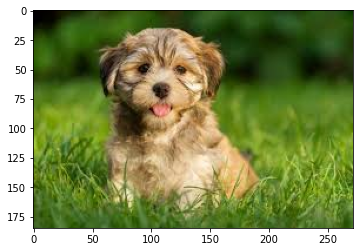

In [127]:
import cv2
img = cv2.imread("/content/1.jfif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [128]:
img.shape

(185, 272, 3)

In [129]:
inp_shape=(32,32,3)
img.resize(inp_shape)
img.shape

(32, 32, 3)

In [130]:
img = img.reshape((1,32,32,3))
print(img.shape)

(1, 32, 32, 3)


In [131]:
labels=  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
i=np.argmax(model.predict(img))
p=labels[i]
print("Predicted label: " + p)

Predicted label: airplane


In [ ]:
from google.colab import files
files.upload()

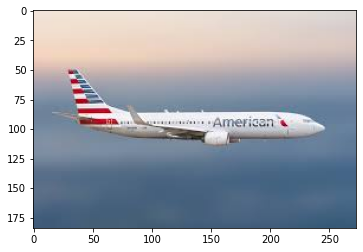

In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/content/2.jfif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [134]:
img.shape

(184, 273, 3)

In [135]:
inp_shape=(32,32,3)
img.resize(inp_shape)
img.shape

(32, 32, 3)

In [136]:
img = img.reshape((1,32,32,3))
print(img.shape)

(1, 32, 32, 3)


In [137]:
labels=  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
i=np.argmax(model.predict(img))
p=labels[i]
print("Predicted label: " + p)

Predicted label: airplane


# Web Application

In [ ]:
!pip install pyngrok

In [ ]:
!pip install streamlit

## App.py

In [146]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image , ImageOps
import cv2 
import numpy as np

labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
  
st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():
  
  model = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_cnn.h5')
  return model

model = lm()

st.write("""
  # CIFAR
""")
file = st.file_uploader("Upload Image",type=['jpeg','jpg','png'])

def import_and_predict(image_data,model):


  size=(32,32)
  img = ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img = np.asarray(img)
  img = img[np.newaxis,...]
  l = np.argmax(model.predict(img))
  i  = labels[l]
  return i

if file is None:
  st.text("")
else:
  image = Image.open(file)
  st.image(image,use_column_width=True)
  p = import_and_predict(image , model)
  st.success(str(p))



Overwriting app.py


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
!unzip /content/ngrok-stable-linux-amd64.zip

In [149]:
!./ngrok authtoken 1gXagyREVZG8UEArEmla3g8urHp_7r2v3jmN7PjoHhvwmCT2P

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [150]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [151]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

'http://e8f96154b117.ngrok.io'